In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import uproot as uproot

In [2]:
from scipy.special import erfinv
from scipy.stats import chi2

In [3]:
f_data = uproot.open("~/wc_framework/TLee_Np0p/ten_by_ten_1000_each/file_map_CL.root")
f_Asimov = uproot.open("~/wc_framework/TLee_Np0p/ten_by_ten_1000_each/file_map_CL_Asimov.root")

f_data_Wilks = uproot.open("~/wc_framework/TLee_Np0p/ten_by_ten_1000_each/file_map_CL_Wilks.root")
f_Asimov_Wilks = uproot.open("~/wc_framework/TLee_Np0p/ten_by_ten_1000_each/file_map_CL_Asimov_Wilks.root")

print(f_data.keys())

['h2d_space;1']


In [4]:
wc_lee_vals_one_dim = f_data["h2d_space"].to_numpy()[1]

wc_sigma_values = np.sqrt(2.) * erfinv(np.transpose(f_data["h2d_space"].to_numpy()[0]))
wc_sigma_values_Asimov = np.sqrt(2.) * erfinv(np.transpose(f_Asimov["h2d_space"].to_numpy()[0]))

wc_sigma_values_Wilks = np.sqrt(2.) * erfinv(np.transpose(f_data_Wilks["h2d_space"].to_numpy()[0]))
wc_sigma_values_Asimov_Wilks = np.sqrt(2.) * erfinv(np.transpose(f_Asimov_Wilks["h2d_space"].to_numpy()[0]))

In [5]:
# from MiniBooNE 2021, https://journals.aps.org/prd/abstract/10.1103/PhysRevD.103.052002
# 200 < E_nu^QE < 1250 MeV, neutrino mode and antineutrino mode


total_miniboone_excess = 638.0
total_miniboone_uncertainty = np.sqrt(52.1**2+122.2**2)
miniboone_NC_delta_pred = 251.9 + 34.7

x_delta_nps = np.linspace(0., wc_lee_vals_one_dim[-1], wc_sigma_values.shape[0])
x_delta_0ps = np.linspace(0., wc_lee_vals_one_dim[-1], wc_sigma_values.shape[0])
x_delta_npsv, x_delta_0psv = np.meshgrid(x_delta_nps, x_delta_0ps)

miniboone_sigmas, _ = np.meshgrid(x_delta_nps, x_delta_0ps) # just for shape, will get each entry replaced

for j in range(x_delta_nps.shape[0]):
    for i in range(x_delta_0ps.shape[0]):
                
        x_delta_np = x_delta_npsv[i,j]
        x_delta_0p = x_delta_0psv[i,j]
        
        miniboone_template_excess = total_miniboone_excess + miniboone_NC_delta_pred * (1. - 0.5 * x_delta_np - 0.5 * x_delta_0p)
        miniboone_sigmas[i,j] = np.abs(miniboone_template_excess) / total_miniboone_uncertainty
        

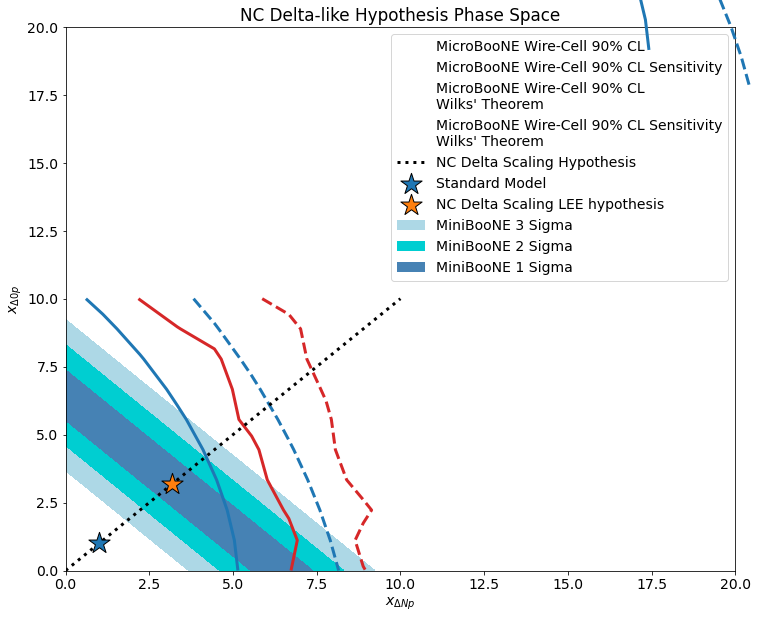

In [6]:
plt.rcParams.update({'font.size': 14})
mpl.rcParams['lines.linewidth'] = 3


fig, ax = plt.subplots(figsize=(12,10))

miniboone_colors = ["lightblue", "darkturquoise", "steelblue"]
miniboone_CS = ax.contourf(x_delta_npsv, x_delta_0psv, miniboone_sigmas, [0, 3], colors=miniboone_colors[0])
miniboone_CS = ax.contourf(x_delta_npsv, x_delta_0psv, miniboone_sigmas, [0, 2], colors=miniboone_colors[1])
miniboone_CS = ax.contourf(x_delta_npsv, x_delta_0psv, miniboone_sigmas, [0, 1], colors=miniboone_colors[2])
    

"""#, linestyles=["dashed", "solid"]
wc_data = ax.contour(x_delta_npsv, x_delta_0psv, wc_sigma_values, [1, 2], colors=["tab:red", "tab:red"], linestyles=["dashed", "solid"])
labels=[r"MicroBooNE Wire-Cell 1$\sigma$", r"MicroBooNE Wire-Cell 2$\sigma$"]
for i in range(len(labels)):
    wc_data.collections[i].set_label(labels[i])
    
wc_asimov = ax.contour(x_delta_npsv, x_delta_0psv, wc_sigma_values_Asimov, [1, 2], colors=["tab:orange", "tab:orange"], linestyles=["dashed", "solid"])
labels=[r"MicroBooNE Wire-Cell 1$\sigma$ Sensitivity", r"MicroBooNE Wire-Cell 2$\sigma$ Sensitivity"]
for i in range(len(labels)):
    wc_asimov.collections[i].set_label(labels[i])
    
wc_data_wilks = ax.contour(x_delta_npsv, x_delta_0psv, wc_sigma_values_Wilks, [1, 2], colors=["tab:blue", "tab:blue"], linestyles=["dashed", "solid"])
labels=[r"MicroBooNE Wire-Cell 1$\sigma$""\nWilks' Theorem", r"MicroBooNE Wire-Cell 2$\sigma$""\nWilks' Theorem"]
for i in range(len(labels)):
    wc_data_wilks.collections[i].set_label(labels[i])
    
wc_asimov_wilks = ax.contour(x_delta_npsv, x_delta_0psv, wc_sigma_values_Asimov_Wilks, [1, 2], colors=["tab:green", "tab:green"], linestyles=["dashed", "solid"])
labels=[r"MicroBooNE Wire-Cell 1$\sigma$ Sensitivity""\nWilks' Theorem", r"MicroBooNE Wire-Cell 2$\sigma$ Sensitivity""\nWilks' Theorem"]
for i in range(len(labels)):
    wc_asimov_wilks.collections[i].set_label(labels[i])"""
    
wc_data = ax.contour(x_delta_npsv, x_delta_0psv, wc_sigma_values, [1.64485], colors=["tab:red"], linestyles=["solid"])
labels=[r"MicroBooNE Wire-Cell 90% CL"]
for i in range(len(labels)):
    wc_data.collections[i].set_label(labels[i])
    
wc_asimov = ax.contour(x_delta_npsv, x_delta_0psv, wc_sigma_values_Asimov, [1.64485], colors=["tab:red"], linestyles=["dashed"])
labels=[r"MicroBooNE Wire-Cell 90% CL Sensitivity"]
for i in range(len(labels)):
    wc_asimov.collections[i].set_label(labels[i])
    
wc_data_wilks = ax.contour(x_delta_npsv, x_delta_0psv, wc_sigma_values_Wilks, [1.64485], colors=["tab:blue"], linestyles=["solid"])
labels=["MicroBooNE Wire-Cell 90% CL\nWilks' Theorem"]
for i in range(len(labels)):
    wc_data_wilks.collections[i].set_label(labels[i])
    
wc_asimov_wilks = ax.contour(x_delta_npsv, x_delta_0psv, wc_sigma_values_Asimov_Wilks, [1.64485], colors=["tab:blue"], linestyles=["dashed"])
labels=["MicroBooNE Wire-Cell 90% CL Sensitivity\nWilks' Theorem"]
for i in range(len(labels)):
    wc_asimov_wilks.collections[i].set_label(labels[i])
    
    
plt.plot([0, x_delta_nps[-1]], [0, x_delta_0ps[-1]], color="k", linestyle="dotted", label="NC Delta Scaling Hypothesis")

plt.scatter(1, 1, label="Standard Model", marker="*", s=500, edgecolors='black', color="tab:blue", zorder=10)
plt.scatter(3.18, 3.18, label="NC Delta Scaling LEE hypothesis", marker="*", s=500, edgecolors='black', color="tab:orange", zorder=10)

handles, labels = plt.gca().get_legend_handles_labels()
proxy = [plt.Rectangle((0,0),1,1,fc=miniboone_colors[_]) for _ in range(3)]
proxy_labels = ["MiniBooNE 1 Sigma", "MiniBooNE 2 Sigma", "MiniBooNE 3 Sigma"][::-1]
L = plt.legend(handles + proxy, labels + proxy_labels, loc="upper right")

plt.xlim((0, 20))
plt.ylim((0, 20))

plt.xlabel(r"$x_{\Delta Np}$")
plt.ylabel(r"$x_{\Delta 0p}$")
plt.title("NC Delta-like Hypothesis Phase Space")
plt.savefig(f"./plots/final_plot_ten_by_ten_1000_each.png", dpi=300)
